In [1]:
import numpy as np
from floris.tools import FlorisInterface
import matplotlib.pyplot as plt
import time

/home/marucs/anaconda3/envs/thesis/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [117]:
fi = FlorisInterface("floris_examples/inputs/gch.yaml")
fi_cc = FlorisInterface("floris_examples/inputs/cc.yaml")
D = 126

In [118]:

N_turb = 100
N_average = 5



In [119]:
# FOR GCH
avg_times_GCH = []
turbines_GCH = []
for i in range(1,N_turb):

    


    y_lay = np.zeros((i))
    x_lay = np.linspace(0, (i-1)*D*5, i)

    fi.reinitialize( layout=( x_lay, y_lay) )


    times_mes = []
    for j in range(N_average):

        start = time.perf_counter()

        fi.reinitialize( wind_directions=[270.0], wind_speeds=[8.0] )

        fi.calculate_wake(yaw_angles=np.random.randn(1,1,i))

        powers = fi.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

        end = time.perf_counter()

        walltime = end - start
        times_mes.append(walltime)
        #print(f"Wall time: {walltime:.3f} s")
    avg_time= np.mean(times_mes)
    #print(f"For {i} turbines the avg time:  {avg_time:.3f} s")
    avg_times_GCH.append(avg_time)
    turbines_GCH.append(i)

avg_times_GCH = np.array(avg_times_GCH)
turbines_GCH = np.array(turbines_GCH)


In [121]:
# FOR CC

avg_times_CC = []
turbines_CC = []
for i in range(1,N_turb):

    


    y_lay = np.zeros((i))
    x_lay = np.linspace(0, (i-1)*D*5, i)

    fi_cc.reinitialize( layout=( x_lay, y_lay) )


    times_mes = []
    for j in range(N_average):

        start = time.perf_counter()

        fi_cc.reinitialize( wind_directions=[270.0], wind_speeds=[8.0] )

        fi_cc.calculate_wake(yaw_angles=np.random.randn(1,1,i))

        powers = fi_cc.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

        end = time.perf_counter()

        walltime = end - start
        times_mes.append(walltime)
        #print(f"Wall time: {walltime:.3f} s")
    avg_time= np.mean(times_mes)
    #print(f"For {i} turbines the avg time:  {avg_time:.3f} s")
    avg_times_CC.append(avg_time)
    turbines_CC.append(i)

avg_times_CC = np.array(avg_times_CC)
turbines_CC = np.array(turbines_CC)


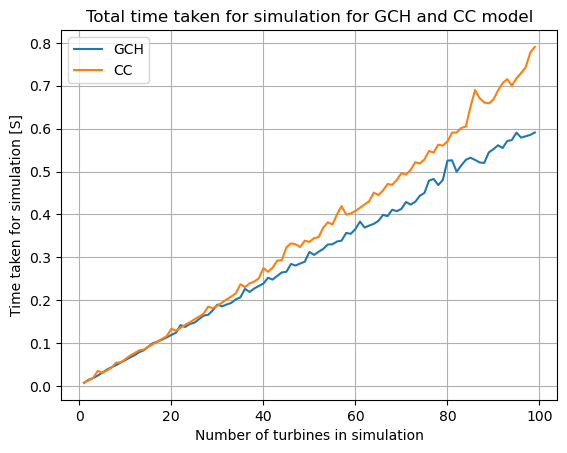

In [124]:
plt.plot(turbines_GCH, avg_times_GCH, label="GCH")
plt.plot(turbines_CC, avg_times_CC, label="CC")
plt.legend()
plt.grid()
plt.xlabel("Number of turbines in simulation")
plt.ylabel("Time taken for simulation [S]")
plt.title("Total time taken for simulation for GCH and CC model")
plt.show()